In [62]:
# Install CorEx 
!pip install corextopic
!pip install networkx

In [56]:
# Import other packages for examples
import pandas as pd
import numpy as np
import scipy.sparse as ss

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import datasets

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [3]:
df = pd.read_csv('reviews_english.csv')
df.dropna(inplace=True)

In [4]:
df.head()d

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,19760,2009-12-10,38960,Anita,ive stayed with my friend at the midtown castl...
1,2595,34320,2010-04-09,71130,Kai-Uwe,weve been staying here for about nights enjo...
2,2595,46312,2010-05-25,117113,Alicia,we had a wonderful stay at jennifers charming ...
3,2595,1238204,2012-05-07,1783688,Sergey,hi to everyone\r would say our greatest compli...
4,2595,1293632,2012-05-17,1870771,Loïc,jennifer was very friendly and helpful and her...


In [64]:
# stopwords to remove from corpus
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['nyc','york', 'stayed', 'really', 'person', 'definitely', 'thank', 'thanks', 'staying', 'looking', 'just', 'stay',
               'also', 'get', 'would', 'aa', 'aaa', 'aaaa', 'aaaaa', 'us', 'great', 'mirco', 'snes', 'myrdith', 'chandra', 'place', 
               'dolores', 'chen', 'even', 'monifa', 'dalton', 'well', 'mk', 'made', 'sahr', 'jt', 'thiago', 'hanna', 'shelly', 'faye',
               'jamilya', 'bertha', 'aya', 'loyda', 'mete', 'tiziana', 'curtis', 'haythem', 'tio', 'however', 'bit', 'regina', 'erica',
               'jenn','edgar', 'jeffrey', 'antonio', 'beatrix', 'tina', 'jesse', 'sammy', 'monika', 'freda', 'kelvin', 'sadie', 'mo',
               'aleksandra', 'elvin', 'farhan', 'jhon', 'jade', 'barry', 'ingrid', 'kem', 'heide', 'je', 'nice', 'like', 'nathan', 'chad',
               'yochi', 'raquel', 'kent', 'zach', 'christa', 'pamela', 'maralla', 'richelle', 'jeannie', 'bernardo', 'kyisvu', 'lauren',
               'gina', 'lucien', 'gus', 'herman', 'darnell', 'wasnt', 'joseph', 'iso', 'emily', 'tracy', 'lynn', 'charlene', 'ronnie', 
               'rosa', 'jackie', 'reka', 'dante', 'dominik', 'rhita', 'pela', 'mia', 'martin', 'sean', 'sara', 'kimberley', 'alexandre', 
               'though', 'soon', 'victor', 'caroline', 'viviana', 'ron', 'matt', 'nick', 'tim', 'robin', 'monica', 'xavier', 'patricia',
               'marjorie', 'teddy', 'maxime', 'loli', 'blanca', 'andressa', 'paulo', 'stacey', 'gillian', 'ross', 'dani', 'susi', 'agnes',
               'javier', 'charisse', 'didnt', 'susi', 'lisas', 'christa', 'elle', 'ever', 'lakshan', 'yuval', 'laurenta', 'everything', 
               'jalen', 'albert', 'joe', 'lucilu', 'greg', 'conrad', 'jeff', 'frances', 'zachs', 'nadir', 'cara', 'olzhas', 'rena',
               'petra', 'kat', 'laurens', 'gane', 'charles', 'martha', 'nora', 'jared', 'britt', 'abe', 'carrie', 'penny', 'harvin',
               'lory', 'vikas', 'remi', 'tonia', 'svetlana', 'seans','holly', 'got', 'dont', 'know', 'let', 'could', 'absolutely',
               'take', 'youre', 'quite', 'need', 'want', 'day', 'back', 'gave', 'enough', 'airbnb', 'anyone', 'ok', 'brooklyn', 'perfect',
               'highly', 'amazing', 'location', 'manhattan', 'good', 'night', 'super', 'one', 'overall', 'two', 'say', 'another', 'said', 
               'people', 'awesome', 'highly', 'loved', 'enjoyed', 'spot', 'excellent', 'lovely', 'time', 'feel', 'sure', 'wonderful', 'recommend',
               'recommended', 'upon', 'home', 'everyone', 'friends', 'apartment', 'beautiful', 'located', 'fantastic', 'needed', 'quick', 'quickly',
               'may', 'high', 'due', 'long', 'things', 'city', 'trip', 'family', 'next', 'every', 'much', 'minutes', 'much', 'felt', 'check', 'use', 'easy',
               'first', 'luggage', 'since', 'hours', 'able', 'never', 'go', 'best', 'see', 'house', 'lot', 'found', 'always', 'went', 'way',
               'nights', 'without', 'took', 'think', 'still', 'week', 'spent', 'told', 'find', 'guests', 'especially', 'make', 'visit',
               'better', 'met','experience', 'arrived','late','left','experience','morning','provided','early','flight','leave','came', 'away', 'come',
               'meet', 'warm', 'going', 'ny', 'give', 'work', 'touches', 'cant', 'top', 'put', 'actually', 'extremely', 'anything', 'exactly',
               'although', 'looks', 'hour']
stopwords.extend(newStopWords)

In [65]:
# using CountVectoizer
vectorizer = CountVectorizer(max_features=20000,
                             stop_words=stopwords,
                             binary=True)

doc_word = vectorizer.fit_transform(df.comments)
words = list(np.asarray(vectorizer.get_feature_names()))

#  6 topics without anchors

In [66]:
# trying 6 topics
# n_hidden is the number of topics
# words is your list of words used in your corpus
topic_model = ct.Corex(n_hidden=6, words=words, seed=1)
topic_model.fit(doc_word, words=words)

In [67]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: kitchen,bathroom,bed,room,towels,bedroom,shower,water,tv,floor
1: subway,restaurants,walk,close,walking,station,distance,park,shops,around
2: issue,space,hotel,parking,keep,issues,someone,extra,mind,reviews
3: new,old,breakfast,friendly,live,real,interesting,part,whole,end
4: questions,comfortable,decorated,clean,spacious,available,helpful,checkin,appreciated,responded
5: keys,help,last,phone,cleaning,something,pictures,asked,guest,airport


# Topic 1: Different rooms in the Airbnb
# Topic 2: Location 
# Topic 3: Issues with Airbnb


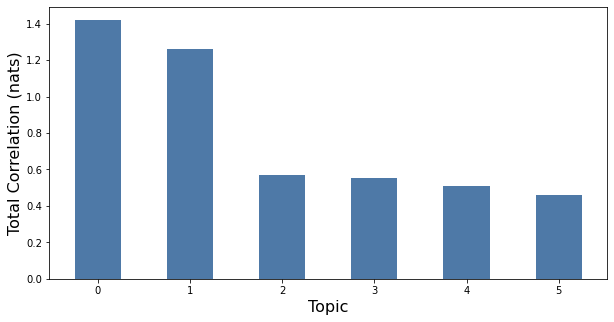

In [68]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

The elbow is at 2 topics.

# 6 topics with anchors

In [70]:
#using anchors
topic_model = ct.Corex(n_hidden=6, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word, words=words, docs=df.comments, 
                anchors=['interior', 
                         'distance', 
                         'issues', 
                         'host',
                         'clean'], anchor_strength=2)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: space,full,interior,old,decorated,fresh,wine,truly,huge,look
1: subway,restaurants,distance,walk,close,walking,station,park,shops,bars
2: kitchen,bathroom,bed,room,bedroom,towels,noise,shower,floor,tv
3: host,automated,canceled,posting,reservation,hosts,arrival,days,gracious,responsive
4: clean,sparkling,tidy,spotlessly,organized,neat,cozy,immaculately,stylish,impeccably
5: new,questions,comfortable,available,help,helpful,checkin,getting,information,last


Results are similar to without anchors but there is a topic of 'Cleanliness' that wasn't in the model without anchors.

In [15]:
top_docs = topic_model.get_top_docs()
for topic_n, topic_docs in enumerate(top_docs):
    docs,probs = zip(*topic_docs)
    topic_str = str(topic_n+1)+': '+', '.join(docs)
    print(topic_str)
    print()

1: the loft is really beautiful with lots of character its got everything you need including a basic kitchen for breakfast  a quick meal the rooftop is a fantastic addition and drinking your morning coffee  under the sun with a unique view over brooklyn is a great way to start the day   it can get a bit hot in the studio during the summer days but the ac kept it cool its also just a  minute walk to the centre of williamsburg and its amazing restaurants bars and shops the subway is   blocks aways and gets you into manhattan in just a few stops we had a great time there and its definitely a cool base to explore the city , we stay   nights in katherines apt the apartment was great very nice clean and awesome views rooftop access was a wonderful bonus  but not really close to the subway station is   km walking distance almost    also the supermarkets are  to   mts union market and whole foods    and the neighborhood is not really nice   the host is very nice and friendly thank you katherin

In [43]:
#overall total correlation
topic_model.tc

5.112629575071236

# 10 topics without anchors

In [44]:
# 10 topics
topic_model2 = ct.Corex(n_hidden=10, words=words, seed=1)
topic_model2.fit(doc_word, words=words)

In [45]:
topics2 = topic_model2.get_topics()
for n,topic in enumerate(topics2):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: noise,floor,door,stairs,building,hear,issue,sleep,loud,thing
1: subway,walk,station,walking,close,distance,away,park,train,blocks
2: kitchen,bathroom,bed,room,towels,tv,shower,bedroom,water,living
3: arrived,late,left,morning,flight,early,breakfast,make,provided,took
4: restaurants,bars,shops,neighborhood,places,many,area,lots,food,local
5: find,better,pictures,hotel,without,going,actually,still,although,told
6: new,around,experience,friendly,visit,come,helpful,corner,help,ny
7: old,guests,put,windows,kids,especially,might,year,whole,music
8: air,space,light,little,touches,extra,top,work,bnb,huge
9: questions,checkin,comfortable,clean,exactly,responded,answered,messages,extremely,answer


These topics yield less  separability 

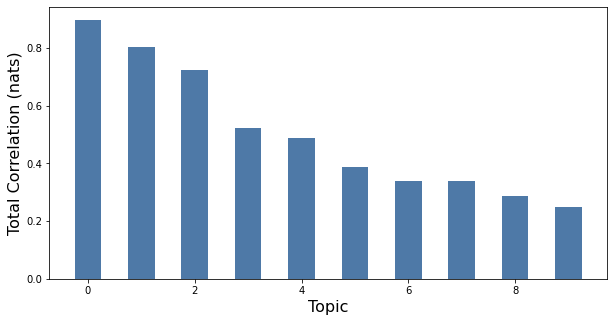

In [46]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model2.tcs.shape[0]), topic_model2.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

# 10 topics with anchors

In [20]:
# anchors with 10 topics
topic_model2_anchors = ct.Corex(n_hidden=10, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model2_anchors.fit(doc_word, words=words, docs=df.comments, 
                anchors=['location', 
                         'interior'], anchor_strength=2)

# Print all topics from the CorEx topic model
topics2_anchors = topic_model2_anchors.get_topics()
for n,topic in enumerate(topics2_anchors):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: subway,restaurants,walk,close,manhattan,station,walking,away,distance,park
1: kitchen,bathroom,towels,water,shower,tv,bedroom,use,fridge,hot
2: brooklyn,city,perfect,need,want,decorated,full,lovely,equipped,family
3: day,arrived,late,first,could,make,early,sure,check,flight
4: back,time,home,feel,come,new,gave,felt,next,go
5: room,one,bed,people,little,big,dont,find,good,problem
6: questions,quick,quickly,exactly,respond,pictures,responded,answered,messages,fast
7: two,building,enough,take,old,couple,nights,large,three,youre
8: night,noise,floor,stairs,small,overall,hear,issue,sleep,loud
9: recommend,airbnb,highly,experience,best,comfortable,space,anyone,absolutely,beautiful


A few noticeable topics but not better than the 6 topic model

# 4 topics without anchors

In [51]:
# trying 4 topics
# n_hidden is the number of topics
# words is your list of words used in your corpus
topic_model_4=ct.Corex(n_hidden=4,words=words, seed=1)
topic_model_4.fit(doc_word, words=words)

In [52]:
# Print all topics from the CorEx topic model
topics = topic_model_4.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: bathroom,bed,room,bedroom,noise,floor,shower,small,door,living
1: arrived,late,left,experience,morning,provided,early,flight,leave,came
2: subway,walk,walking,away,distance,station,park,kitchen,within,street
3: restaurants,shops,bars,around,neighborhood,area,many,close,new,places


Lost some of the topics from 6-topic model so the 6-topic model yielded the best topic distinction